### Description: Sparse Bayesian learning (Scalar input/output; Polynomial basis functions)
#### Author: Rimple Sandhu, Carleton University; Email: rimple_sandhu@outlook.com
#### Additional packages required: [UQTk](www.sandia.gov)

In [1]:
#!/usr/bin/python
from numpy import *
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import os
import math
import sys

In [2]:
N = 3 # degree+1 of polynomial proposed; number of unknowns
Yobs = loadtxt('Ydata.dat') 
Xobs = loadtxt('Xdata.dat')
M = len(Yobs)

In [10]:
def PhiMat(X):
    M = len(X)
    Phi = zeros((M,N))
    for i in range(0,M):
        for j in range(0,N):
            Phi[i,j] = X[i]**j
    return Phi
Phi = PhiMat(Xobs)

In [72]:
def LikFn(W,rho):
    return multivariate_normal.pdf(Yobs,matmul(Phi,W),identity(M)/rho)

In [73]:
def PosteriorVar(alpha,rho):
    return linalg.inv(diag(alpha) + rho*matmul(transpose(Phi),Phi))

def PosteriorMean(alpha,rho):
    return rho*matmul(matmul(PosteriorVar(alpha,rho),transpose(Phi)),Yobs)

def PosteriorPdf(W,alpha,rho):
    return multivariate_normal.pdf(W,PosteriorMean(alpha,rho),PosteriorVar(alpha,rho))

In [74]:
def Evidence(alpha,rho):
    return multivariate_normal.pdf(Yobs,[0]*M,identity(M)/rho + matmul(matmul(Phi,linalg.inv(diag(alpha))),transpose(Phi)))

In [75]:
def PosteriorPred(Xnew,alpha,rho):
    Mnew = len(Xnew)
    PhiNew = PhiMat(Xnew)
    MuNew = PhiNew*PosteriorMean(alpha,rho)
    VarNew = identity(Mnew)/rho + matmul(matmul(PhiNew,linalg.inv(PosteriorVar(alpha,rho))),transpose(PhiNew))
    return multivariate_normal.pdf(Ynew,PhiNew*MuNew,VarNew)

In [112]:
Wsample = [1,1,1]
alphaSample = [1,1,1]
LikFn(Wsample,100)
PosteriorVar(alphaSample,100)
PosteriorMean(alphaSample,100)
PosteriorPdf(Wsample,alphaSample,100)
Evidence(alphaSample,100);

Plot alpha vs evidence for a relevant parameter

Text(0.5,0,'$Log(\\alpha)$')

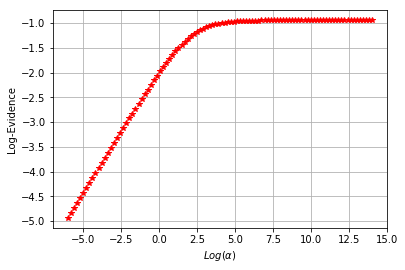

In [127]:
Ns = 100
alphaPlot = linspace(-6,14,Ns)
rho = 100
Evid = zeros((Ns,1))
for i in range(0,Ns):
    alphaSample = exp([-6,alphaPlot[i],-6])
    Evid[i] = Evidence(alphaSample,rho)
fig = plt.figure(1)
plt.plot(alphaPlot,log(Evid),'r*')
plt.grid(True)
plt.ylabel('Log-Evidence')
plt.xlabel(r'$Log(\alpha)$')
#plt.savefig('SBL_evid.pdf',bbox_inches='tight')

Plot alpha vs evidence for irrelevant parameter

Text(0.5,0,'$Log(\\alpha)$')

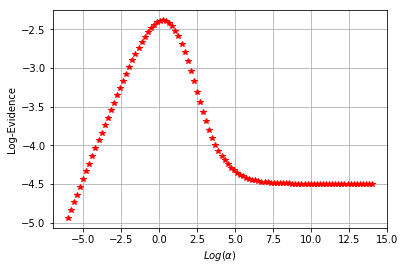

In [129]:
Ns = 100
alphaPlot = linspace(-6,14,Ns)
rho = 100
Evid = zeros((Ns,1))
for i in range(0,Ns):
    alphaSample = exp([-6,-6,alphaPlot[i]])
    Evid[i] = Evidence(alphaSample,rho)
fig = plt.figure(2)
plt.plot(alphaPlot,log(Evid),'r*')
plt.grid(True)
plt.ylabel('Log-Evidence')
plt.xlabel(r'$Log(\alpha)$')
#plt.savefig('SBL_evid.pdf',bbox_inches='tight')

Plot evidence for all parameters assuming same hyper-parameter

Text(0.5,0,'$Log(\\alpha)$')

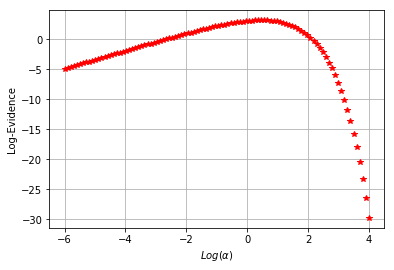

In [131]:
Ns = 100
alphaPlot = linspace(-6,4,Ns)
rho = 100
Evid = zeros((Ns,1))
for i in range(0,Ns):
    alphaSample = exp([alphaPlot[i],alphaPlot[i],alphaPlot[i]])
    Evid[i] = Evidence(alphaSample,rho)
fig = plt.figure(2)
plt.plot(alphaPlot,log(Evid),'r*')
plt.grid(True)
plt.ylabel('Log-Evidence')
plt.xlabel(r'$Log(\alpha)$')
#plt.savefig('SBL_evid.pdf',bbox_inches='tight')